<a href="https://colab.research.google.com/github/martings/ML_Practica_y_Herramientas/blob/main/Herramientas_de_pd_matplot_y_scikit_learn_sobre_los_datos_de_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook voy a hacer un analisis exploratorio usando algunas herramientas de python orientado a data science (pandas, numpy, matplotlib, sckit.learn)

In [42]:
#Importo todas las dependencias a usar
#No tiene q estar obligatoriamente en el comiezo
#Pero es una buena practica hacerlos asi. 
#!pip install graphviz
import pandas as pd
import pydotplus
from IPython.display import Image
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [21]:
#Cargo los datos
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(url)


In [22]:
titanic_df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [5]:
#Mido la dimensionalidad de titanic_df de varias maneras
print("Shape del conjunto de datos de Titanic:", titanic_df.shape)

titanic_df.info()

titanic_df.describe()

print("Distribución de género en el conjunto de datos de Titanic:")
print(titanic_df["Sex"].value_counts())

print("Cantidad de sobrevivientes por clase:")
print(titanic_df.groupby("Pclass")["Survived"].sum())




Shape del conjunto de datos de Titanic: (887, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
Distribución de género en el conjunto de datos de Titanic:
male      573
female    314
Name: Sex, dtype: int64
Cantidad de sobrevivientes por clase:
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [3]:
#Usando la herramienta de pandas groupby se puede armar distintas preguntas a los datos
# Tabla que muestra la cantidad de sobrevivientes por clase
survived_by_class = titanic_df.groupby("Pclass")["Survived"].sum()
survived_by_class = pd.DataFrame(survived_by_class)
survived_by_class.columns = ["Cantidad de sobrevivientes"]
print(survived_by_class)

# Tabla que muestra la tasa de supervivencia por clase
survival_rate_by_class = titanic_df.groupby("Pclass")["Survived"].mean()
survival_rate_by_class = pd.DataFrame(survival_rate_by_class)
survival_rate_by_class.columns = ["Tasa de supervivencia"]
print(survival_rate_by_class)

        Cantidad de sobrevivientes
Pclass                            
1                              136
2                               87
3                              119
        Tasa de supervivencia
Pclass                       
1                    0.629630
2                    0.472826
3                    0.244353


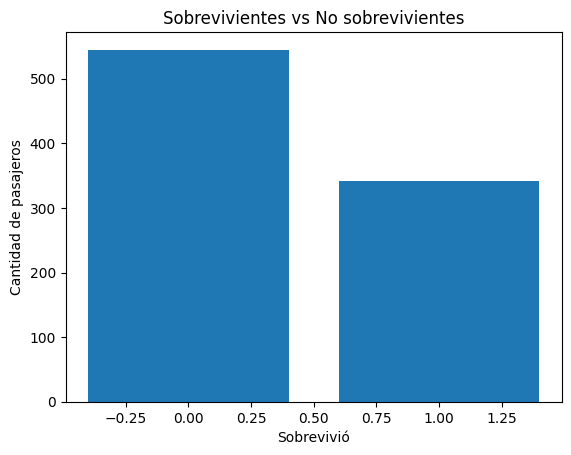

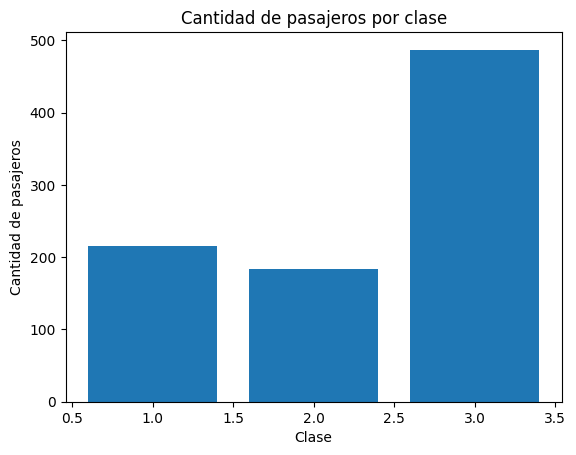

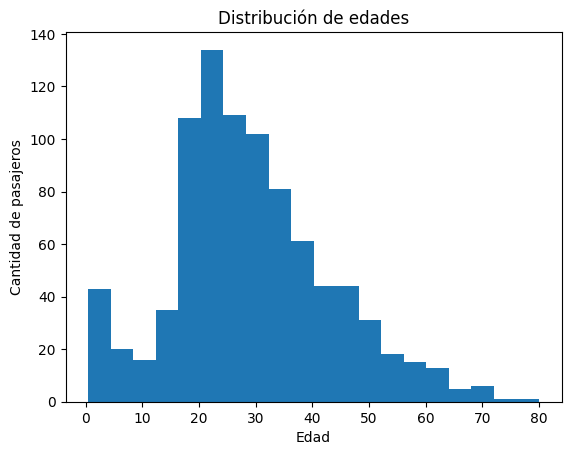

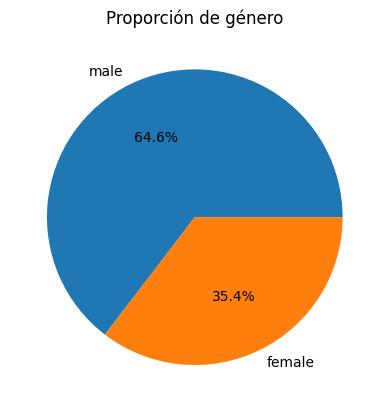

In [4]:
# EDA con algunos gráficos
# Gráfico de barras que muestra la cantidad de sobrevivientes y no sobrevivientes
survived_count = titanic_df["Survived"].value_counts()
plt.bar(survived_count.index, survived_count.values)
plt.title("Sobrevivientes vs No sobrevivientes")
plt.xlabel("Sobrevivió")
plt.ylabel("Cantidad de pasajeros")
plt.show()

# Gráfico de barras que muestra la cantidad de pasajeros en cada clase
class_count = titanic_df["Pclass"].value_counts()
plt.bar(class_count.index, class_count.values)
plt.title("Cantidad de pasajeros por clase")
plt.xlabel("Clase")
plt.ylabel("Cantidad de pasajeros")
plt.show()

# Histograma que muestra la distribución de edades de los pasajeros
plt.hist(titanic_df["Age"].dropna(), bins=20)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pasajeros")
plt.show()

# Gráfico de pastel que muestra la proporción de género de los pasajeros
gender_count = titanic_df["Sex"].value_counts()
plt.pie(gender_count.values, labels=gender_count.index, autopct="%1.1f%%")
plt.title("Proporción de género")
plt.show()

Utilizando s

In [14]:
titanic_df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,NaN,22.0,1,0,7.2500
1,1,1,NaN,38.0,1,0,71.2833
2,1,3,NaN,26.0,0,0,7.9250
3,1,1,NaN,35.0,1,0,53.1000
4,0,3,NaN,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,NaN,27.0,0,0,13.0000
883,1,1,NaN,19.0,0,0,30.0000
884,0,3,NaN,7.0,1,2,23.4500
885,1,1,NaN,26.0,0,0,30.0000


In [74]:
from IPython.core.display import display_png
# Eliminar las columnas irrelevantes o que contengan valores faltantes
titanic_df_skl = titanic_df.drop(["Name"], axis=1)
titanic_df_skl = titanic_df_skl.dropna()

# Convertir la columna "Sex" en valores numéricos
titanic_df_skl['Sex'] = titanic_df_skl['Sex'].map({'male': 0, 'female': 1})

# Separar los datos en las variables de entrada (X) y de salida (y)
y = titanic_df_skl['Survived']
X = titanic_df_skl.drop('Survived', axis=1)

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Random Forest con los datos de entrenamiento
rf_model = RandomForestClassifier(n_estimators=5, random_state=100)
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Creamos el archivo de gráfico de árbol
dot_data = export_graphviz(rf_model.estimators_[0], out_file=None, feature_names=X_train.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)

# Visualizamos el gráfico de árbol con Graphviz
graph = graphviz.Source(dot_data)
#Descomentando lo de abajo se puede guardar
graph.view()
# Guardar el gráfico en un archivo SVG
graph.format = 'png'
graph.render('tree')
# Mostrar el gráfico en la notebook
display_png('tree.png', raw= True)

#El display puede fallar dependiendo de los codecs y demas, pero se puede descargar el arbol

Precisión del modelo: 0.7752808988764045
